In [2]:
#importing libraries

import pandas as pd
import h2o
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn
rcParams['figure.figsize'] = 20, 12
df_data=pd.read_csv("./Data/merged_final_data", sep=',', encoding='latin1', error_bad_lines=False)

d=df_data.loc[:, ~df_data.columns.str.contains('^Unnamed: 0')]
df1 = d[['SYSBP','DBP','HR','TEMP','WEIGHT','HEIGHT']]
# df1 = df1.sample(frac=1).reset_index(drop=True)

In [3]:
h2o.init()
h2o_df = h2o.H2OFrame(df1, column_types={'SYSBP':'numeric','DBP':'numeric','HR':'numeric','WEIGHT':'numeric','HEIGHT':'numeric','TEMP':'numeric'})
h2o_df.describe() # you should now see the desired data types 
df_t = h2o_df.as_data_frame(True)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,30 mins 05 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,22 days
H2O cluster name:,H2O_from_python_exepaul_25npfz
H2O cluster total nodes:,1
H2O cluster free memory:,783 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:1113
Cols:6




,SYSBP,DBP,HR,TEMP,WEIGHT,HEIGHT
type,int,int,int,real,int,int
mins,0.0,0.0,0.0,0.0,0.0,0.0
mean,128.60377358490567,80.0925426774483,77.12309074573214,35.98346810422281,73.23899371069177,37.755615453728616
maxs,220.0,126.0,116.0,39.9,150.0,195.0
sigma,17.267162876535487,10.587910002603056,12.880264048127726,4.229118805981434,20.387443846945864,70.53227440878716
zeros,4,3,9,15,8,864
missing,0,0,0,0,0,0
0,123.0,89.0,63.0,36.2,58.0,165.0
1,125.0,90.0,80.0,36.1,58.0,0.0
2,125.0,80.0,80.0,36.3,58.0,0.0


In [4]:
df_t.shape

(1113, 6)

In [5]:
predictors=list(range(0,6))
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator

seed_value=13
model = H2OAutoEncoderEstimator(activation="Tanh", hidden=[8,4,2,4,8],
                                ignore_const_cols=False, epochs=200,seed=seed_value,reproducible=True)

model.train(x=predictors,training_frame=h2o_df)

recon_error = model.anomaly(h2o_df)

print(model)
    

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1529066457095_1


ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.005828731370383919
RMSE: 0.076346128719038
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
,2018-06-15 18:41:10,0.275 sec,0.00000 obs/sec,0.0,0,0.0,0.1831591,0.0335473
,2018-06-15 18:41:10,0.467 sec,6288 obs/sec,1.0,1,1113.0,0.0946098,0.0089510
,2018-06-15 18:41:10,0.550 sec,8868 obs/sec,2.0,2,2226.0,0.0827740,0.0068515
,2018-06-15 18:41:10,0.615 sec,10805 obs/sec,3.0,3,3339.0,0.0832301,0.0069272
,2018-06-15 18:41:10,0.657 sec,12979 obs/sec,4.0,4,4452.0,0.0807536,0.0065211
---,---,---,---,---,---,---,---,---
,2018-06-15 18:41:11,1.181 sec,28615 obs/sec,19.0,19,21147.0,0.0791864,0.0062705
,2018-06-15 18:41:11,1.210 sec,29212 obs/sec,20.0,20,22260.0,0.0769989,0.0059288
,2018-06-15 18:41:11,1.237 sec,29888 obs/sec,21.0,21,23373.0,0.0789417,0.0062318
,2018-06-15 18:41:11,1.269 sec,30342 obs/sec,22.0,22,24486.0,0.0768465,0.0059054



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
SYSBP,1.0,1.0,0.2436582
WEIGHT,0.7587335,0.7587335,0.1848716
HR,0.7296341,0.7296341,0.1777813
DBP,0.5851560,0.5851560,0.1425780
HEIGHT,0.5703092,0.5703092,0.1389605
TEMP,0.4602777,0.4602777,0.1121504


In [38]:
from matplotlib import cm

def multidim_plot(network, data, rmse_value ,layers, header):

    multidim_data = network.deepfeatures(data, layers)
    data_frame=multidim_data.cbind(rmse_value).as_data_frame()
#     print(data_frame)

    map_data = cm.get_cmap('Spectral')
    plot_v, axis = plt.subplots()
    data_frame.plot(kind='scatter', 
                    x='DF.L{}.C1'.format(layers+1), 
                    y='DF.L{}.C2'.format(layers+1),
                    s = 500,
                    c = 'Reconstruction.MSE',
                    title = header,
                    ax = axis,
                    colormap=map_data)
    layer_column = 'DF.L{}.C'.format(layers + 1)
    columns = [layer_column + '1', layer_column + '2']
    for k, v in data_frame[columns].iterrows():
        axis.annotate(k, v, size=20, verticalalignment='bottom', horizontalalignment='left')
    plot_v.canvas.draw()

deepfeatures progress: |██████████████████████████████████████████████████| 100%


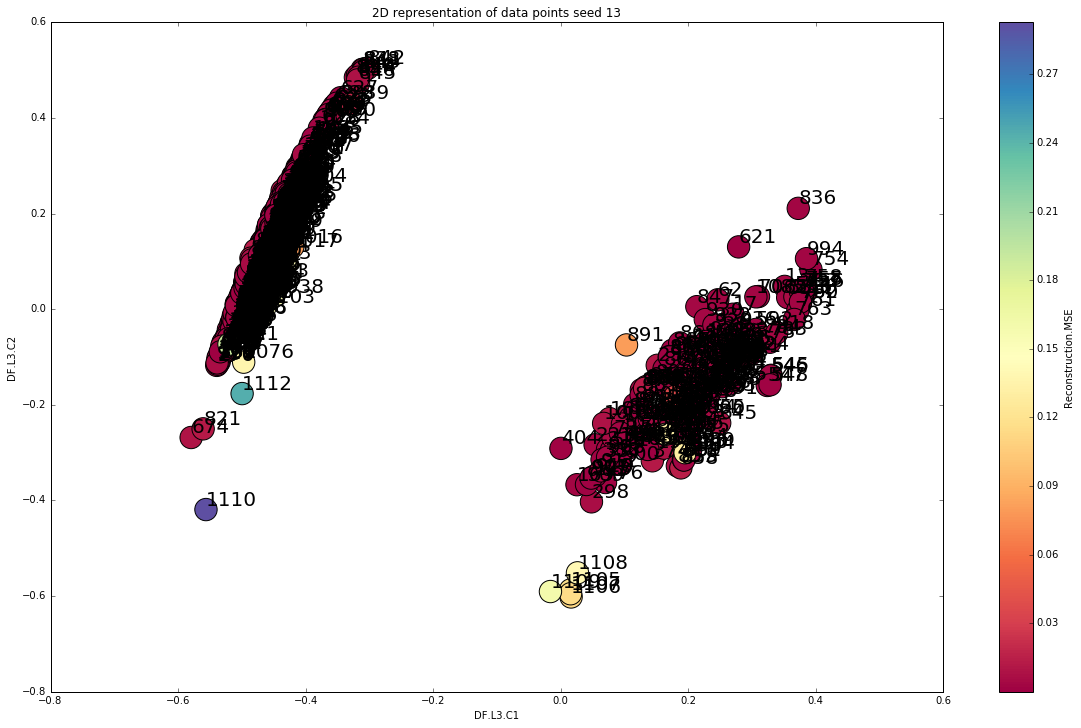

In [39]:
multidim_plot(model, h2o_df, recon_error, 2, "2D representation of data points seed {}".format(seed_value))

In [40]:
model

Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1529060988577_24


ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.005828731370383919
RMSE: 0.076346128719038
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
,2018-06-15 17:16:03,0.014 sec,0.00000 obs/sec,0.0,0,0.0,0.1831591,0.0335473
,2018-06-15 17:16:03,0.036 sec,58578 obs/sec,1.0,1,1113.0,0.0946098,0.0089510
,2018-06-15 17:16:03,0.055 sec,65470 obs/sec,2.0,2,2226.0,0.0827740,0.0068515
,2018-06-15 17:16:03,0.074 sec,69562 obs/sec,3.0,3,3339.0,0.0832301,0.0069272
,2018-06-15 17:16:03,0.119 sec,51172 obs/sec,4.0,4,4452.0,0.0807536,0.0065211
---,---,---,---,---,---,---,---,---
,2018-06-15 17:16:04,0.397 sec,70023 obs/sec,19.0,19,21147.0,0.0791864,0.0062705
,2018-06-15 17:16:04,0.418 sec,70000 obs/sec,20.0,20,22260.0,0.0769989,0.0059288
,2018-06-15 17:16:04,0.435 sec,70613 obs/sec,21.0,21,23373.0,0.0789417,0.0062318
,2018-06-15 17:16:04,0.451 sec,71387 obs/sec,22.0,22,24486.0,0.0768465,0.0059054



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
SYSBP,1.0,1.0,0.2436582
WEIGHT,0.7587335,0.7587335,0.1848716
HR,0.7296341,0.7296341,0.1777813
DBP,0.5851560,0.5851560,0.1425780
HEIGHT,0.5703092,0.5703092,0.1389605
TEMP,0.4602777,0.4602777,0.1121504


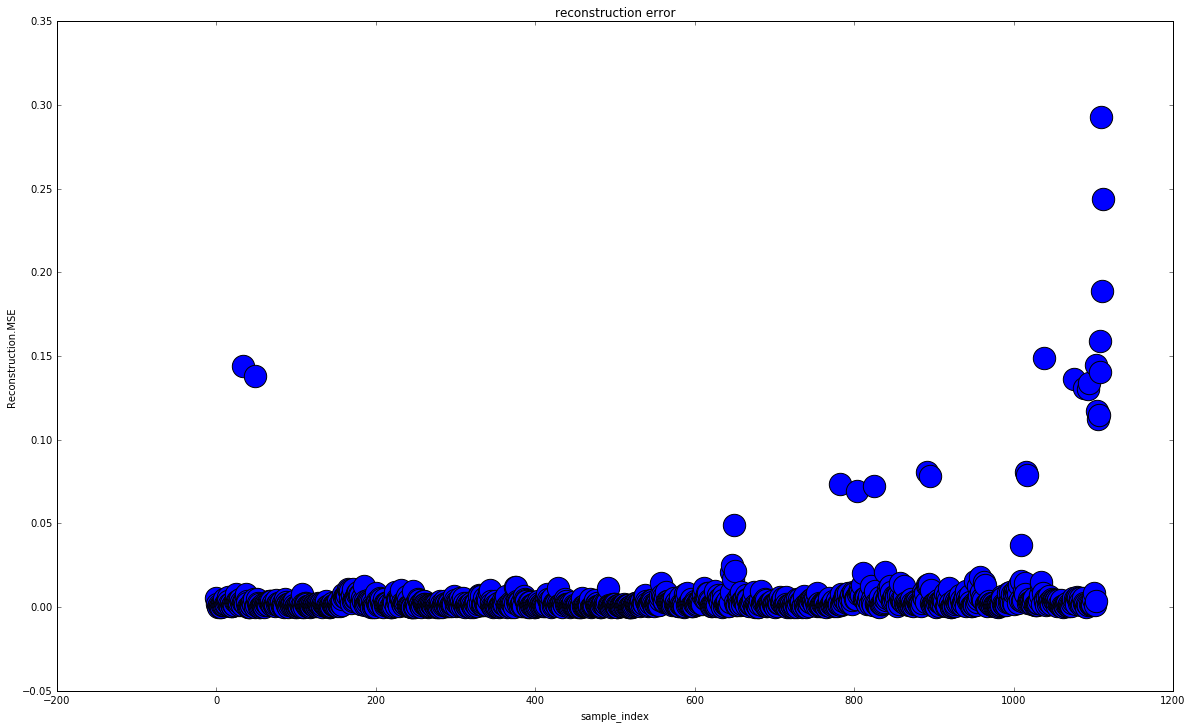

In [41]:
plt.figure()
df=recon_error.as_data_frame(True)

df["sample_index"]=df.index

df.plot(kind="scatter", x="sample_index", y="Reconstruction.MSE", 
        title = "reconstruction error", s = 500)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%


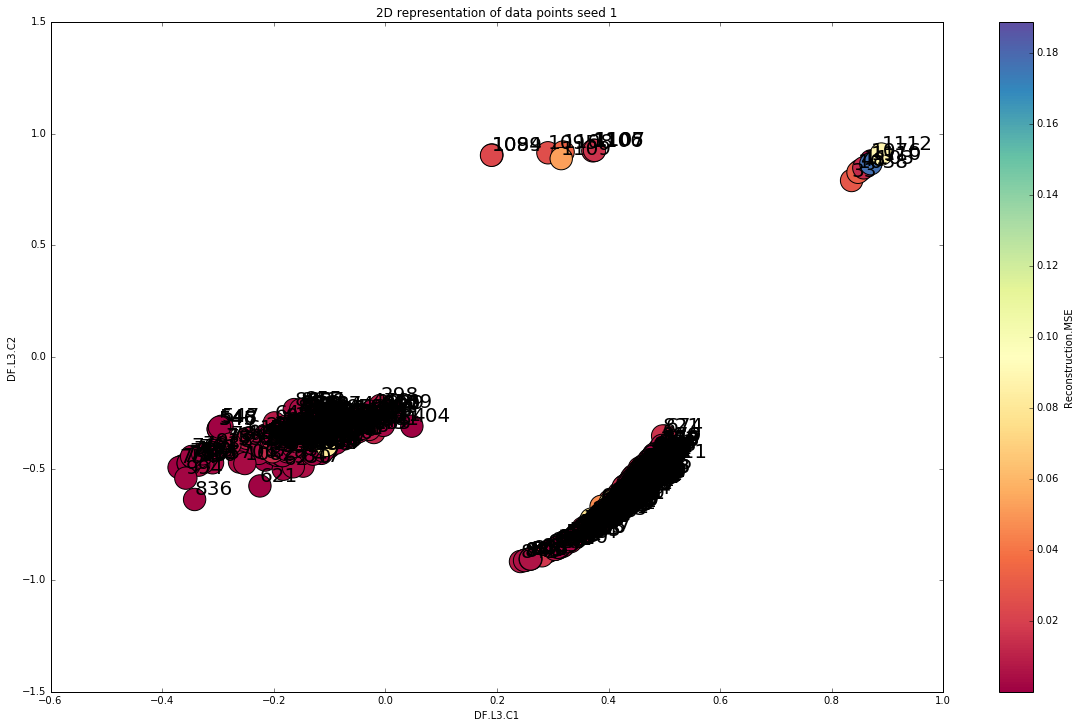

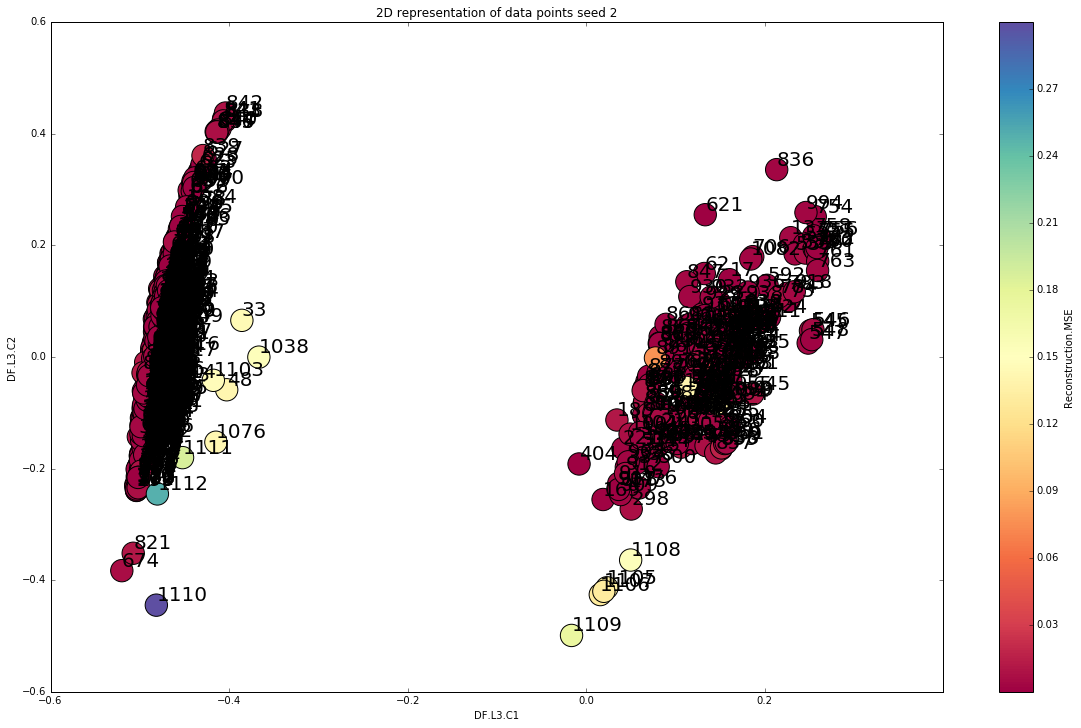

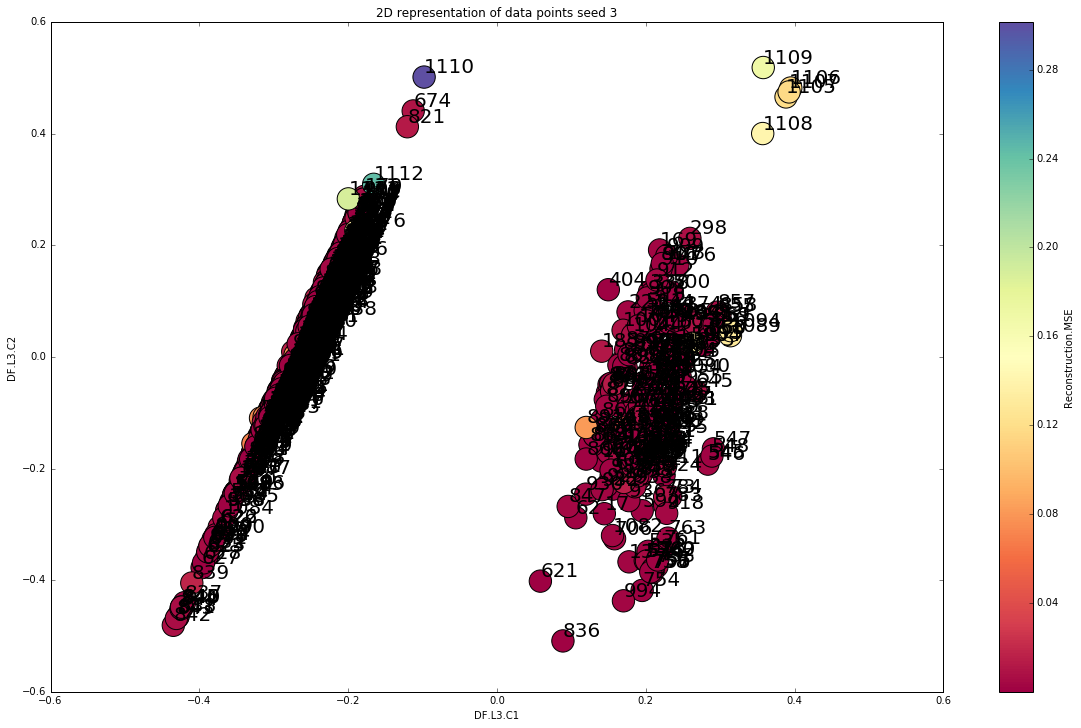

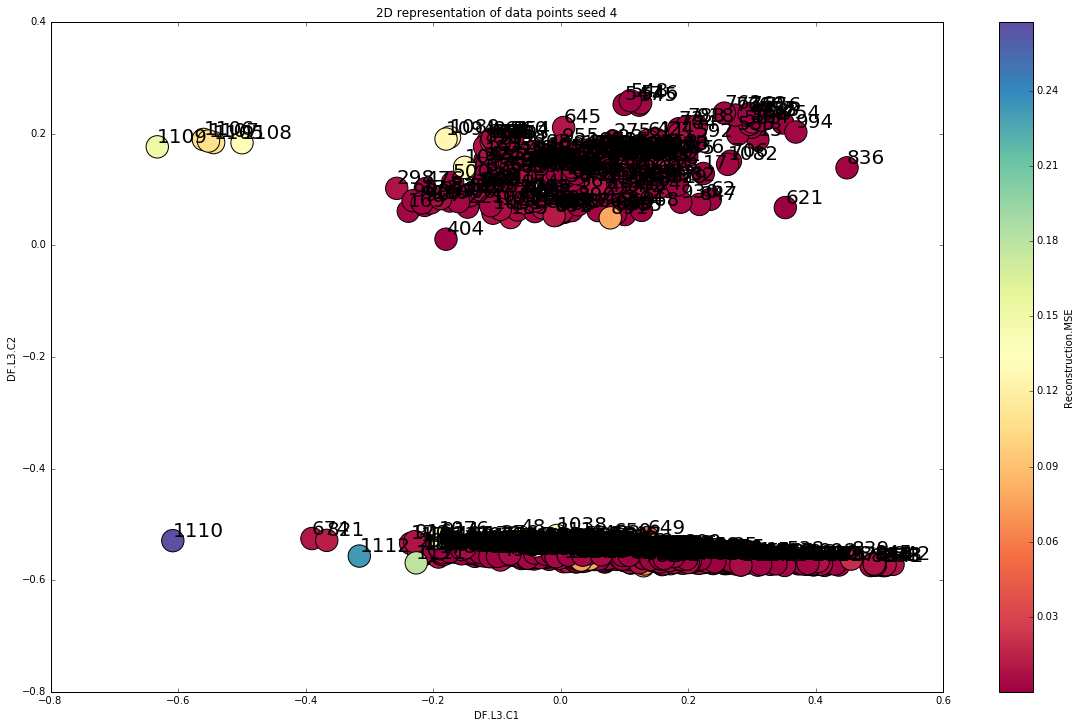

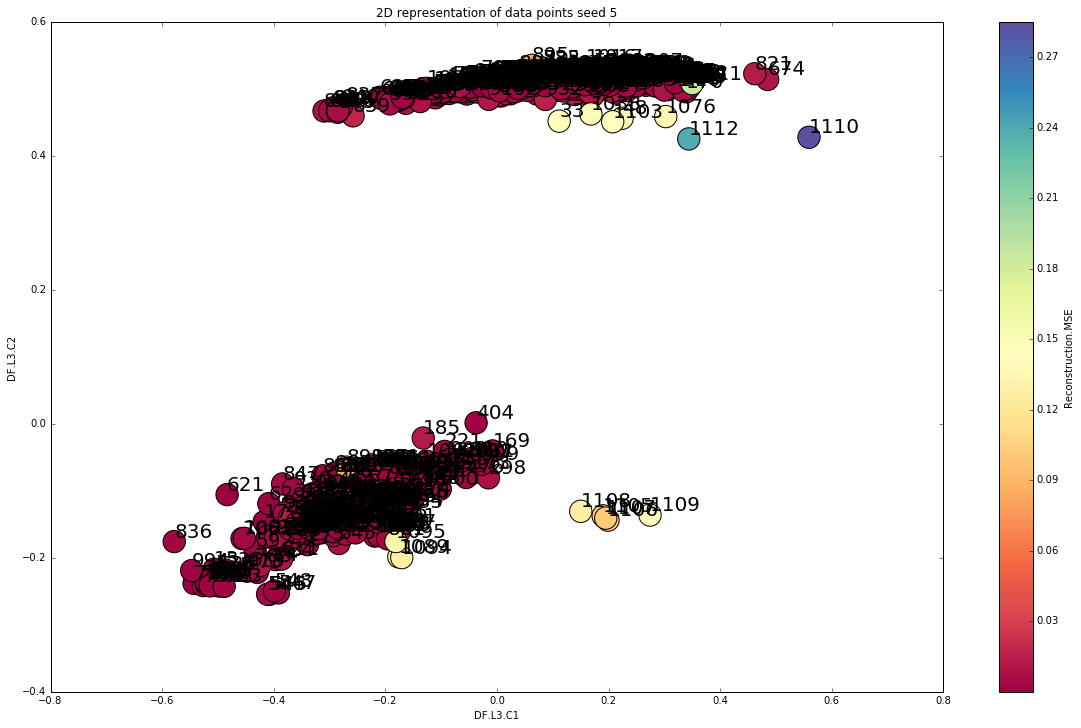

In [42]:
for seed in range(1, 6):
    model = H2OAutoEncoderEstimator(
        activation="Tanh",
        hidden=[8,4, 2, 4, 8],
        epochs=100,
        #sparse=True,
        #l1=1e-5,
        seed=seed,
        reproducible=True)
    model.train(
    x=h2o_df.names,
    training_frame=h2o_df)

    recon_error = model.anomaly(h2o_df)
    multidim_plot(model, h2o_df, recon_error, 2, "2D representation of data points seed {}".format(seed))
    # compute average and variance of the 2 dimensions

In [43]:
print(recon_error)
print(len(recon_error))

Reconstruction.MSE
0.00547116
0.00175787
0.000178351
0.00101028
0.000818414
0.000120586
0.000106207
0.00100647
0.00143919
0.00126546



1113


In [27]:
df=recon_error.as_data_frame(True)

In [28]:
import plotly

plotly.tools.set_credentials_file(username='monk', api_key='r8HWPtsbMixW8W0j7Cnj')
import plotly.plotly as py
import plotly.graph_objs as go

In [29]:
trace2 = go.Box(
    y = df['Reconstruction.MSE'].tolist(),
    name = "Suspected Outliers",
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)')
)

In [30]:
data = [trace2]
layout = go.Layout(
    title = "Box Plot Styling Outliers"
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Box Plot Styling Outliers")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~monk/0 or inside your plot.ly account where it is named 'Box Plot Styling Outliers'


In [44]:
df=recon_error.as_data_frame(True)
list_data=df['Reconstruction.MSE'].tolist()

def get_iqr(recon_error):
    final=recon_error.as_data_frame()

    boxplotEdges=final.quantile(.75)
    iqr = np.subtract(*np.percentile(final, [75, 25]))
    top_whisker=boxplotEdges[0]+(1.5*iqr)
    return top_whisker

In [45]:
def outliers(data):
    outliers=[]
    non_outliers=[]
    for index,value in enumerate(data):
        if value > get_iqr(recon_error):
            outliers.append(index)
        else:
            non_outliers.append(index)
            
    return {'outliers':len(outliers),'non_outliers':len(non_outliers), 'outliers_list':outliers}

print(outliers(list_data))


# {'outliers': 78, 'non_outliers': 1035, 'outliers_list': [33, 48, 165, 166, 167, 172, 185, 232, 247, 343, 374,
# 376, 429, 491, 558, 591, 611, 612, 615, 617, 646, 647, 648, 649, 650, 674, 683, 782, 804, 807, 810, 811, 821, 
# 825, 839, 845, 858, 863, 886, 891, 892, 893, 894, 895, 897, 919, 940, 952, 956, 958, 963, 964, 1001, 1002, 1004, 
# 1007, 1009, 1010, 1013, 1014, 1016, 1017, 1034, 1035, 1038, 1076, 1089, 1094, 1095, 1103, 1105, 1106, 1107, 1108, 
# 1109, 1110, 1111, 1112]}


{'outliers': 78, 'non_outliers': 1035, 'outliers_list': [33, 48, 165, 166, 167, 172, 185, 232, 247, 343, 374, 376, 429, 491, 558, 591, 611, 612, 615, 617, 646, 647, 648, 649, 650, 674, 683, 782, 804, 807, 810, 811, 821, 825, 839, 845, 858, 863, 886, 891, 892, 893, 894, 895, 897, 919, 940, 952, 956, 958, 963, 964, 1001, 1002, 1004, 1007, 1009, 1010, 1013, 1014, 1016, 1017, 1034, 1035, 1038, 1076, 1089, 1094, 1095, 1103, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112]}
